# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

fatal: destination path 'damavand' already exists and is not an empty directory.


In [2]:
!pip install -r damavand/requirements.txt

# Importings

In [23]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import SEU
from damavand.damavand.signal_processing import *
from damavand.damavand.utils import *

import pandas as pd
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Instantiating a downloader object

In [4]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['SEU'])
downloader.download_extract('SEU.zip', 'SEU/')

# Instantiating a digestor object

In [5]:
seu = SEU('SEU/')
mining_params = {
    'win_len': 10000,
    'hop_len': 10000
}
seu.mine(mining_params)

Mining:  Chipped_20_0.csv
Mining:  Miss_20_0.csv
Mining:  Root_30_2.csv
Mining:  Surface_20_0.csv
Mining:  Health_20_0.csv
Mining:  Root_20_0.csv
Mining:  Miss_30_2.csv
Mining:  Health_30_2.csv
Mining:  Chipped_30_2.csv
Mining:  Surface_30_2.csv
Mining:  ball_20_0.csv
Mining:  comb_20_0.csv
Mining:  ball_30_2.csv
Mining:  inner_20_0.csv
Mining:  health_20_0.csv
Mining:  comb_30_2.csv
Mining:  outer_30_2.csv
Mining:  health_30_2.csv
Mining:  inner_30_2.csv
Mining:  outer_20_0.csv


# Aggregating data over the second channel

In [6]:
df = pd.concat(seu.data[1]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,test_bed,state,rot_speed
0,0.000503,0.002112,0.003276,0.002187,0.000864,0.003220,-0.000612,0.000082,0.000796,0.003134,...,-0.001155,0.000290,0.000763,-0.000211,0.002804,0.003674,0.000706,Gear_set,Chipped,20
1,0.003633,-0.000229,0.000552,-0.000004,0.002151,0.003697,0.001304,0.004830,0.004209,0.003994,...,0.000752,-0.002675,0.002458,0.002286,-0.001379,0.002416,0.005218,Gear_set,Chipped,20
2,0.002939,-0.000224,0.000743,0.000638,0.000941,0.004123,-0.001305,0.001551,0.005114,0.000157,...,0.001551,0.000154,0.001876,0.001844,0.001475,0.001525,0.000941,Gear_set,Chipped,20
3,0.000901,0.001673,0.000249,0.001255,0.001456,0.000186,0.001425,0.000232,-0.000758,0.002090,...,0.001602,0.000980,0.001359,0.007073,0.002937,0.004625,0.004481,Gear_set,Chipped,20
4,0.003072,0.000039,0.000633,0.000852,-0.000666,0.001584,0.000923,0.002730,0.004590,0.000892,...,-0.002054,-0.002071,0.003704,0.000231,0.003415,0.005243,0.000980,Gear_set,Chipped,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,0.003477,0.004098,-0.000902,0.002244,-0.000417,-0.000520,0.001959,0.001307,-0.002608,0.004534,...,-0.000941,-0.001752,-0.000422,-0.001873,-0.000856,0.001448,0.001341,Bearing_set,outer,20
2076,0.001140,0.001454,0.002049,0.000772,0.001109,-0.001004,-0.000777,0.000978,0.000858,0.001173,...,-0.000085,0.000597,-0.000103,0.000166,0.000979,0.000370,0.000114,Bearing_set,outer,20
2077,0.000862,-0.000015,0.000430,0.000468,0.000056,0.001246,0.001090,0.000552,0.000275,-0.000464,...,-0.001698,0.002050,0.000086,0.000114,0.002718,0.000453,0.000899,Bearing_set,outer,20
2078,0.002031,0.000311,0.000124,-0.002179,-0.001022,-0.000153,-0.001156,-0.000972,-0.000298,-0.000947,...,0.000472,-0.001147,0.001435,-0.000050,0.000645,-0.002612,0.003531,Bearing_set,outer,20


# Signals-Metadata declaration

In [7]:
signals, metadata = df.iloc[:, : - 3], df.iloc[:, - 3 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.000503,0.002112,0.003276,0.002187,0.000864,0.003220,-0.000612,0.000082,0.000796,0.003134,...,0.001869,0.001483,0.000743,-0.001155,0.000290,0.000763,-0.000211,0.002804,0.003674,0.000706
1,0.003633,-0.000229,0.000552,-0.000004,0.002151,0.003697,0.001304,0.004830,0.004209,0.003994,...,0.002317,0.000151,-0.000625,0.000752,-0.002675,0.002458,0.002286,-0.001379,0.002416,0.005218
2,0.002939,-0.000224,0.000743,0.000638,0.000941,0.004123,-0.001305,0.001551,0.005114,0.000157,...,0.001116,0.000269,0.000259,0.001551,0.000154,0.001876,0.001844,0.001475,0.001525,0.000941
3,0.000901,0.001673,0.000249,0.001255,0.001456,0.000186,0.001425,0.000232,-0.000758,0.002090,...,0.000246,-0.000108,0.001671,0.001602,0.000980,0.001359,0.007073,0.002937,0.004625,0.004481
4,0.003072,0.000039,0.000633,0.000852,-0.000666,0.001584,0.000923,0.002730,0.004590,0.000892,...,0.001267,0.003988,0.002531,-0.002054,-0.002071,0.003704,0.000231,0.003415,0.005243,0.000980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,0.003477,0.004098,-0.000902,0.002244,-0.000417,-0.000520,0.001959,0.001307,-0.002608,0.004534,...,-0.001024,-0.000501,-0.000623,-0.000941,-0.001752,-0.000422,-0.001873,-0.000856,0.001448,0.001341
2076,0.001140,0.001454,0.002049,0.000772,0.001109,-0.001004,-0.000777,0.000978,0.000858,0.001173,...,0.000672,0.000901,0.000944,-0.000085,0.000597,-0.000103,0.000166,0.000979,0.000370,0.000114
2077,0.000862,-0.000015,0.000430,0.000468,0.000056,0.001246,0.001090,0.000552,0.000275,-0.000464,...,0.000809,0.004516,0.002311,-0.001698,0.002050,0.000086,0.000114,0.002718,0.000453,0.000899
2078,0.002031,0.000311,0.000124,-0.002179,-0.001022,-0.000153,-0.001156,-0.000972,-0.000298,-0.000947,...,0.000643,0.000139,0.000671,0.000472,-0.001147,0.001435,-0.000050,0.000645,-0.002612,0.003531


In [8]:
metadata

,test_bed,state,rot_speed
0,Gear_set,Chipped,20
1,Gear_set,Chipped,20
2,Gear_set,Chipped,20
3,Gear_set,Chipped,20
4,Gear_set,Chipped,20
...,...,...,...
2075,Bearing_set,outer,20
2076,Bearing_set,outer,20
2077,Bearing_set,outer,20
2078,Bearing_set,outer,20


# Signal Processing

## FFT

In [9]:
window = scipy.signal.windows.hann(signals.shape[1])
freq_filter = scipy.signal.butter(25, [15, 950], 'bandpass', fs = 2000, output='sos')

In [10]:
signals_fft = fft(signals, freq_filter = freq_filter, window = window)
signals_fft.shape

(2080, 5000)

## Statistical Features

In [11]:
signals_features = feature(signals, {'mean': np.mean, 'var': np.var, 'rms': rms, 'skew': skew, 'kurtosis': kurtosis})
signals_features.shape

(2080, 5)

# Health classification task

## Target declaration

In [12]:
y = metadata['state']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
np.unique(y_encoded, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([208, 208, 208, 208, 208, 208, 208, 208, 208, 208]))

In [13]:
lb = LabelBinarizer()
y_bin = lb.fit_transform(y_encoded)

## Train-test split

In [14]:
x_fft_train, x_fft_test, x_features_train, x_features_test, y_encoded_train, y_encoded_test, y_bin_train, y_bin_test = train_test_split(signals_fft, signals_features, y_encoded, y_bin, test_size=0.33, random_state=42)

## Training

### Classic machine learning

In [15]:
DT = DecisionTreeClassifier()
DT.fit(x_features_train, y_encoded_train)

DecisionTreeClassifier()

### Deep Learning

In [16]:
def model_creator():

  input = Input(shape = (5000,), name='input1')
  e = Dense(units = 2500, activation='tanh', name = 'HL1')(input)
  predicted_label = Dense(units = 10, activation='softmax', name='label')(e)

  return Model(inputs = input, outputs = predicted_label)

In [17]:
scaler = MinMaxScaler()
x_fft_train_scaled = scaler.fit_transform(x_fft_train)
x_fft_test_scaled = scaler.transform(x_fft_test)

In [18]:
lr = 0.0001
ep = 25

model = model_creator()
opt = optimizers.Adam(learning_rate=lr, decay=lr / ep)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

histories  = model.fit(x_fft_train_scaled, y_bin_train, validation_split=0.25, epochs = ep, batch_size = 250)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 737ms/step - accuracy: 0.1329 - loss: 2.5406 - val_accuracy: 0.2636 - val_loss: 1.9598
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 412ms/step - accuracy: 0.2904 - loss: 1.8779 - val_accuracy: 0.6017 - val_loss: 1.4486
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - accuracy: 0.6108 - loss: 1.3780 - val_accuracy: 0.7593 - val_loss: 1.1201
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.8138 - loss: 1.0299 - val_accuracy: 0.9828 - val_loss: 0.8795
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.9521 - loss: 0.8040 - val_accuracy: 0.9628 - val_loss: 0.7117
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 647ms/step - accuracy: 0.9742 - loss: 0.6438 - val_accuracy: 0.9857 - val_loss: 0.5797
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 0.9917 - loss: 0.4939 - val_accuracy: 1.0000 - val_loss: 0.4681
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step - accuracy: 1.0000 - loss: 0.4052 - val_accuracy: 1.0000 - val_loss: 0.4004
Epo

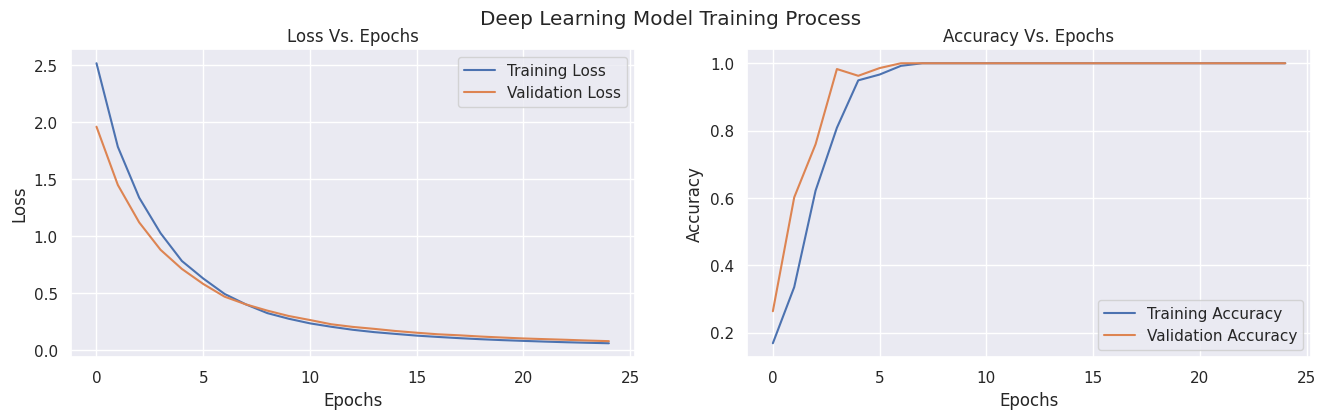

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
fig.suptitle('Deep Learning Model Training Process')
axes[0].plot(histories.history['loss'], label='Training Loss')
axes[0].plot(histories.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Vs. Epochs')
axes[0].legend()

axes[1].plot(histories.history['accuracy'], label='Training Accuracy')
axes[1].plot(histories.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Vs. Epochs')
axes[1].legend()
plt.show()

## Evaluation

In [21]:
y_train_pred_DT = DT.predict(x_features_train)
y_test_pred_DT = DT.predict(x_features_test)
y_train_pred_DL = np.argmax(model.predict(x_fft_train_scaled), axis = 1)
y_test_pred_DL = np.argmax(model.predict(x_fft_test_scaled), axis = 1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


### Accuracies

In [22]:
print('Decision tree training accuracy: ', np.round(accuracy_score(y_encoded_train, y_train_pred_DT), 4))
print('Decision tree testing accuracy: ', np.round(accuracy_score(y_encoded_test, y_test_pred_DT), 4))
print('Deep learnign model training accuracy: ', np.round(accuracy_score(y_encoded_train, y_train_pred_DL), 4))
print('Deep learnign model testing accuracy: ', np.round(accuracy_score(y_encoded_test, y_test_pred_DL),  4))

Decision tree training accuracy:  1.0
Decision tree testing accuracy:  0.8195
Deep learnign model training accuracy:  1.0
Deep learnign model testing accuracy:  1.0


### Confusion Matrices

In [24]:
confusion_matrix_DT = confusion_matrix(y_encoded_test, y_test_pred_DT)
confusion_matrix_DL = confusion_matrix(y_encoded_test, y_test_pred_DL)

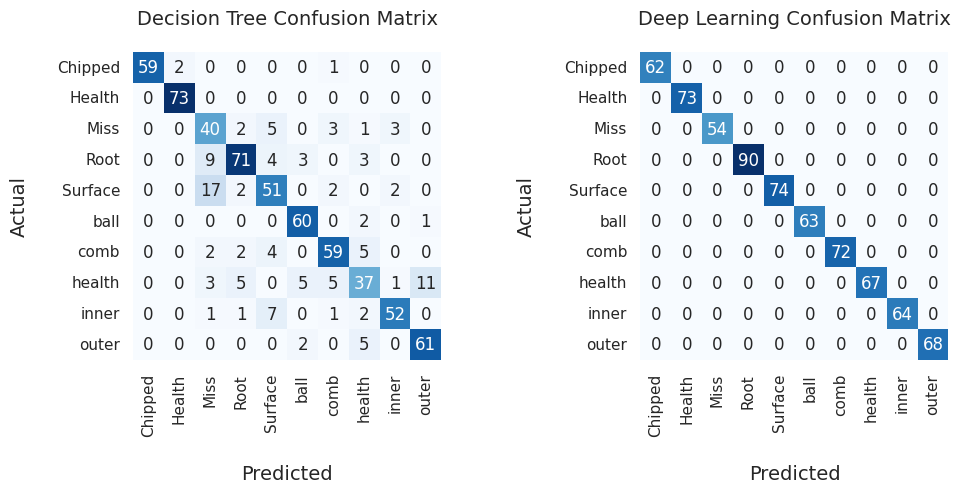

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.heatmap(confusion_matrix_DT, annot=True, square = True, cmap='Blues', fmt='g', cbar = False, ax=axes[0])
axes[0].set_xlabel("Predicted", fontsize=14, labelpad=20)
axes[0].xaxis.set_ticklabels(le.classes_)
axes[0].set_ylabel("Actual", fontsize=14, labelpad=20)
axes[0].yaxis.set_ticklabels(le.classes_)
axes[0].set_title("Decision Tree Confusion Matrix", fontsize=14, pad=20)
axes[0].tick_params(axis='x', rotation=90)
axes[0].tick_params(axis='y', rotation=360)

sns.heatmap(confusion_matrix_DL, annot=True, square = True, cmap='Blues', fmt='g', cbar = False, ax=axes[1])
axes[1].set_xlabel("Predicted", fontsize=14, labelpad=20)
axes[1].xaxis.set_ticklabels(le.classes_)
axes[1].set_ylabel("Actual", fontsize=14, labelpad=20)
axes[1].yaxis.set_ticklabels(le.classes_)
axes[1].set_title("Deep Learning Confusion Matrix", fontsize=14, pad=20)
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', rotation=360)

plt.show()